In [3]:
#calling packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 

#importting data
tax_data = pd.read_csv('/Users/avanthpakanati/Desktop/ECON:HLTH Research Seminar /Homework3/data/Output/taxburden_data.csv')



   Unnamed: 0    state  Year  cost_per_pack  sales_per_capita  tax_dollar  \
0           0  Alabama  1970          0.427              89.8         0.2   
1           1  Alabama  1971          0.423              95.4         0.2   
2           2  Alabama  1972          0.421             101.1         0.2   
3           3  Alabama  1973          0.431             102.9         0.2   
4           4  Alabama  1974          0.466             108.2         0.2   

   tax_percent  tax_revenue  tax_state      index  price_cpi  
0         46.8   36739131.0       0.12  38.825000   2.397579  
1         47.3   39490694.0       0.12  40.491667   2.277357  
2         47.5   42198422.0       0.12  41.816667   2.194771  
3         46.4   43328876.0       0.12  44.400000   2.116171  
4         42.9   45943402.0       0.12  49.308333   2.060260  


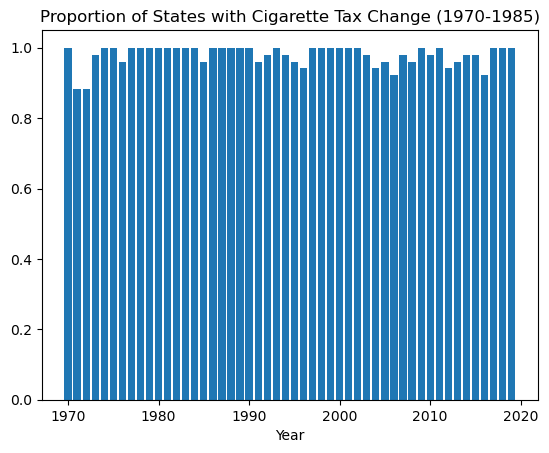

In [5]:
#summarize the data
#question 1 
tax_data = tax_data.sort_values(by=['state', 'Year'])
tax_data['tax_change'] = tax_data.groupby('state')['tax_percent'].diff().ne(0).astype(int)
tax_change_proportion = tax_data.groupby('Year')['tax_change'].mean()

plt.bar(tax_change_proportion.index, tax_change_proportion.values)
plt.title('Proportion of States with Cigarette Tax Change (1970-1985)')
plt.xlabel('Year')
plt.show()

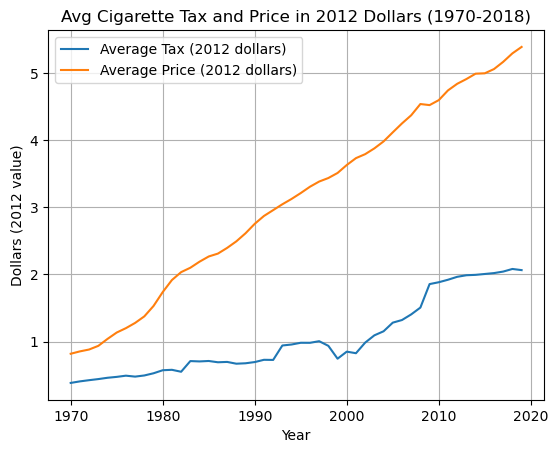

In [9]:
#question 2 
#in 2012 $$$
cpi_2012 = tax_data.loc[tax_data['Year'] == 2012, 'price_cpi'].iloc[0]
tax_data['tax_dollar_2012'] = tax_data['tax_dollar'] * (cpi_2012 / tax_data['price_cpi'])
tax_data['price_per_pack_2012'] = tax_data['cost_per_pack'] * (cpi_2012 / tax_data['price_cpi'])

avg_values = tax_data.groupby('Year')[['tax_dollar_2012', 'price_per_pack_2012']].mean()

#plot graph
plt.plot(avg_values.index, avg_values['tax_dollar_2012'], label='Average Tax (2012 dollars)')
plt.plot(avg_values.index, avg_values['price_per_pack_2012'], label='Average Price (2012 dollars)')
plt.legend()
plt.title('Avg Cigarette Tax and Price in 2012 Dollars (1970-2018)')
plt.xlabel('Year')
plt.ylabel('Dollars (2012 value)')
plt.grid(True)
plt.show()


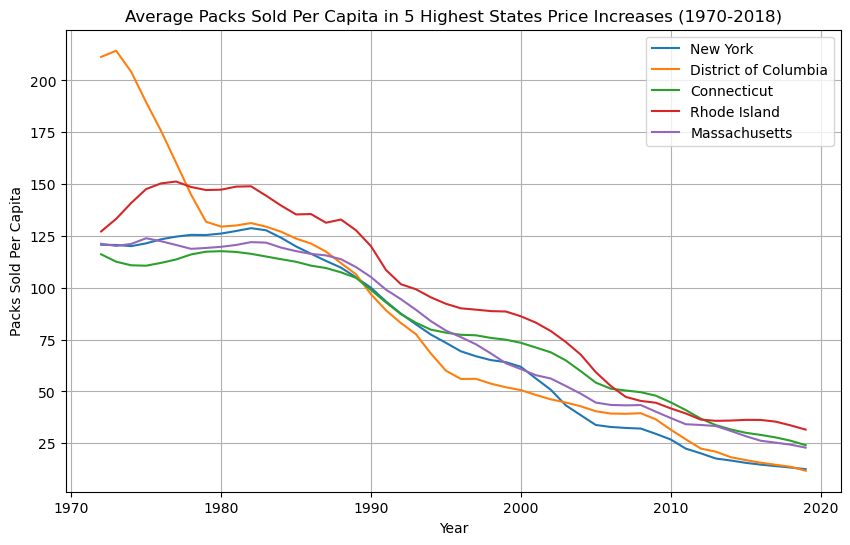

In [15]:
#Question 3 
# identify 5 states w/ highest inncrease in cig prices
tax_data_2018 = tax_data[tax_data['Year'] == 2018].set_index('state')
tax_data_1970 = tax_data[tax_data['Year'] == 1970].set_index('state')

price_increase_state = tax_data_2018['cost_per_pack'] - tax_data_1970['cost_per_pack']
top_5_states = price_increase_state.nlargest(5).index
top_5_data = tax_data[tax_data['state'].isin(top_5_states)]


plt.figure(figsize=(10, 6))
for state in top_5_states:
    state_data = top_5_data[top_5_data['state'] == state]
    plt.plot(state_data['Year'], state_data['sales_per_capita'].rolling(window=3).mean(), label=state)

plt.title('Average Packs Sold Per Capita in 5 Highest States Price Increases (1970-2018)')
plt.xlabel('Year')
plt.ylabel('Packs Sold Per Capita')
plt.legend()
plt.grid(True)

plt.show()


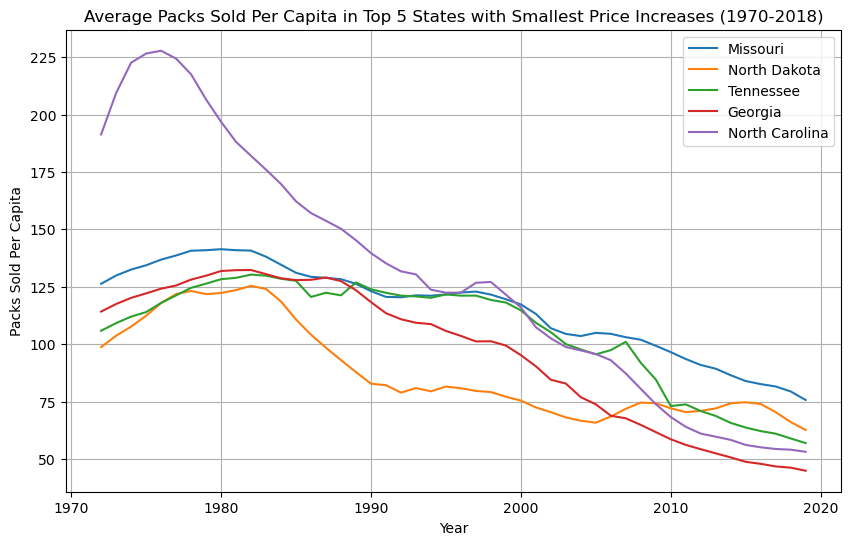

In [16]:
#question 4
#Lowest increase in cig prices


# 5 states with the lowest price increase
bottom_5_states = price_increase_state.nsmallest(5).index
bottom_5_data = tax_data[tax_data['state'].isin(bottom_5_states)]

plt.figure(figsize=(10, 6))
for state in bottom_5_states:
    state_data = bottom_5_data[bottom_5_data['state'] == state]
    plt.plot(state_data['Year'], state_data['sales_per_capita'].rolling(window=3).mean(), label=state)

plt.title('Average Packs Sold Per Capita in Top 5 States with Smallest Price Increases (1970-2018)')
plt.xlabel('Year')
plt.ylabel('Packs Sold Per Capita')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#question 5 comparing 

In [24]:
#Estimate ATEs 

#Question 6
#Only 1970-1990, regressing log sales on log price 

cig_data = tax_data[(tax_data['Year'] >= 1970) & (tax_data['Year'] <= 1990)]

cig_data['ln_sales'] = np.log(cig_data['sales_per_capita'])
cig_data['ln_price'] = np.log(cig_data['cost_per_pack'])
cig_data['ln_total_tax'] = np.log(cig_data['tax_dollar'])

#running OLS regression
X = sm.add_constant(cig_data['ln_price'])  
y = cig_data['ln_sales']

regression_results = sm.OLS(y, X).fit()
print(regression_results.summary())


                            OLS Regression Results                            
Dep. Variable:               ln_sales   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     153.9
Date:                Sun, 16 Mar 2025   Prob (F-statistic):           4.18e-33
Time:                        17:49:49   Log-Likelihood:                 148.99
No. Observations:                1071   AIC:                            -294.0
Df Residuals:                    1069   BIC:                            -284.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7504      0.008    585.321      0.0

/var/folders/2q/wzjp_2kd355b8clhzqwmytb40000gn/T/ipykernel_83685/4233090682.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cig_data['ln_sales'] = np.log(cig_data['sales_per_capita'])
/var/folders/2q/wzjp_2kd355b8clhzqwmytb40000gn/T/ipykernel_83685/4233090682.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cig_data['ln_price'] = np.log(cig_data['cost_per_pack'])
/var/folders/2q/wzjp_2kd355b8clhzqwmytb40000gn/T/ipykernel_83685/4233090682.py:10: SettingWithCopyWarning: 
A value is trying to be set on 

In [20]:
#Question 7 and 8, log sales on log prices 
#First stage 
first_stage = sm.OLS(cig_data['ln_price'], sm.add_constant(cig_data['ln_total_tax'])).fit()
print("First stage Regression (ln_price ~ ln_total_tax):\n")
print(first_stage.summary())

First stage Regression (ln_price ~ ln_total_tax):

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     2301.
Date:                Sun, 16 Mar 2025   Prob (F-statistic):          8.21e-269
Time:                        17:34:03   Log-Likelihood:                -86.164
No. Observations:                1071   AIC:                             176.3
Df Residuals:                    1069   BIC:                             186.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [21]:
# Log prices from the first stage
price_hat = first_stage.predict(sm.add_constant(cig_data['ln_total_tax']))

# Second-stage regression (IV Regression)
second_stage = sm.OLS(cig_data['ln_sales'], sm.add_constant(price_hat)).fit()
print("\nSecond stage Regression (ln_sales ~ pricehat):\n")
print(second_stage.summary())


Second stage Regression (ln_sales ~ pricehat):

                            OLS Regression Results                            
Dep. Variable:               ln_sales   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     330.3
Date:                Sun, 16 Mar 2025   Prob (F-statistic):           1.56e-64
Time:                        17:37:35   Log-Likelihood:                 221.17
No. Observations:                1071   AIC:                            -438.3
Df Residuals:                    1069   BIC:                            -428.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

In [25]:
#Question 9 - repeat for 1991-2015
cig_data2 = tax_data[(tax_data['Year'] >= 1991) & (tax_data['Year'] <= 2015)]

cig_data2['ln_sales'] = np.log(cig_data2['sales_per_capita'])
cig_data2['ln_price'] = np.log(cig_data2['cost_per_pack'])
cig_data2['ln_total_tax'] = np.log(cig_data2['tax_dollar'])

#running OLS regression
X2 = sm.add_constant(cig_data2['ln_price'])  
Y2 = cig_data2['ln_sales']


reg2 = sm.OLS(Y2, X2).fit()
print(reg2.summary())


                            OLS Regression Results                            
Dep. Variable:               ln_sales   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     1451.
Date:                Sun, 16 Mar 2025   Prob (F-statistic):          1.52e-212
Time:                        17:50:26   Log-Likelihood:                -296.47
No. Observations:                1275   AIC:                             596.9
Df Residuals:                    1273   BIC:                             607.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0395      0.023    219.934      0.0

/var/folders/2q/wzjp_2kd355b8clhzqwmytb40000gn/T/ipykernel_83685/1083457502.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cig_data2['ln_sales'] = np.log(cig_data2['sales_per_capita'])
/var/folders/2q/wzjp_2kd355b8clhzqwmytb40000gn/T/ipykernel_83685/1083457502.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cig_data2['ln_price'] = np.log(cig_data2['cost_per_pack'])
/var/folders/2q/wzjp_2kd355b8clhzqwmytb40000gn/T/ipykernel_83685/1083457502.py:6: SettingWithCopyWarning: 
A value is trying to be set 